In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
print(X)
y = y.reshape(10,1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


##Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
y = scaler_y.fit_transform(y)

In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


##Training SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')

svr.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##Predicting a new result

In [ ]:
scaler_y.inverse_transform(svr.predict(scaler_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

##Visualising the SVR Curve

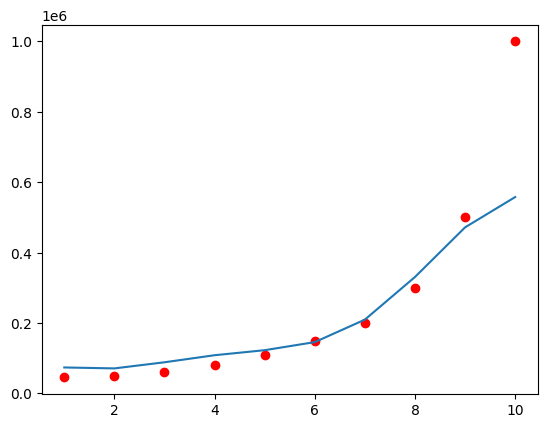

In [ ]:
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color = 'red')
plt.plot(scaler_X.inverse_transform(X), scaler_y.inverse_transform(svr.predict(X).reshape(-1,1)))
plt.show()

## Visualising SVR curve in a higher resolution

/tmp/ipython-input-1834142752.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(scaler_X.inverse_transform(X)), max(scaler_X.inverse_transform(X)), 0.1)


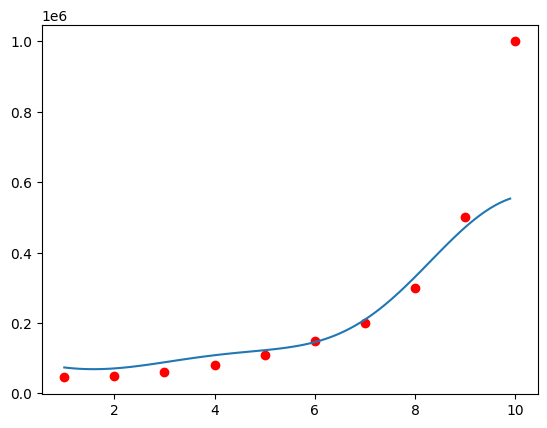

In [ ]:
X_grid = np.arange(min(scaler_X.inverse_transform(X)), max(scaler_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, scaler_y.inverse_transform(svr.predict(scaler_X.transform(X_grid)).reshape(-1,1)))
